In [8]:
import pandas as pd
df = pd.read_csv("../3_Analysis_on_Extracted_Data/tracking_features_with_labels.csv")
df.head()

,tracking_id,num_points,bbox_area,point_density,avg_segment_distance,num_stops,cluster,pca1,pca2,predicted_label
0,59,72,0.001813,39681.685256,104.093826,72,1,-1.241092,-0.515201,TOWN
1,65,154,0.006207,24806.119875,103.039632,154,1,-0.030022,0.038345,TOWN
2,78,237,0.046257,5123.419281,153.782723,237,0,1.011410,2.180849,SUBURBAN
3,87,14,0.002002,6988.110554,508.602238,14,1,-2.481341,0.018362,TOWN
4,172,253,0.000831,304095.272770,50.290536,253,0,1.661802,-0.039573,SUBURBAN


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

features = df.drop(columns=["tracking_id", "cluster", "predicted_label", "pca1", "pca2"])
labels = df["predicted_label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       RURAL       0.00      0.00      0.00         0
    SUBURBAN       1.00      0.97      0.99        35
        TOWN       0.99      0.99      0.99       124
       URBAN       1.00      1.00      1.00        11

    accuracy                           0.99       170
   macro avg       0.75      0.74      0.74       170
weighted avg       0.99      0.99      0.99       170

Confusion Matrix:
[[  0   0   0   0]
 [  0  34   1   0]
 [  1   0 123   0]
 [  0   0   0  11]]


/home/neyon/fhv/bachelor_thesis_infeo/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/neyon/fhv/bachelor_thesis_infeo/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/neyon/fhv/bachelor_thesis_infeo/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [10]:
import joblib
joblib.dump(clf, "rf_area_classifier.pkl")


['rf_area_classifier.pkl']

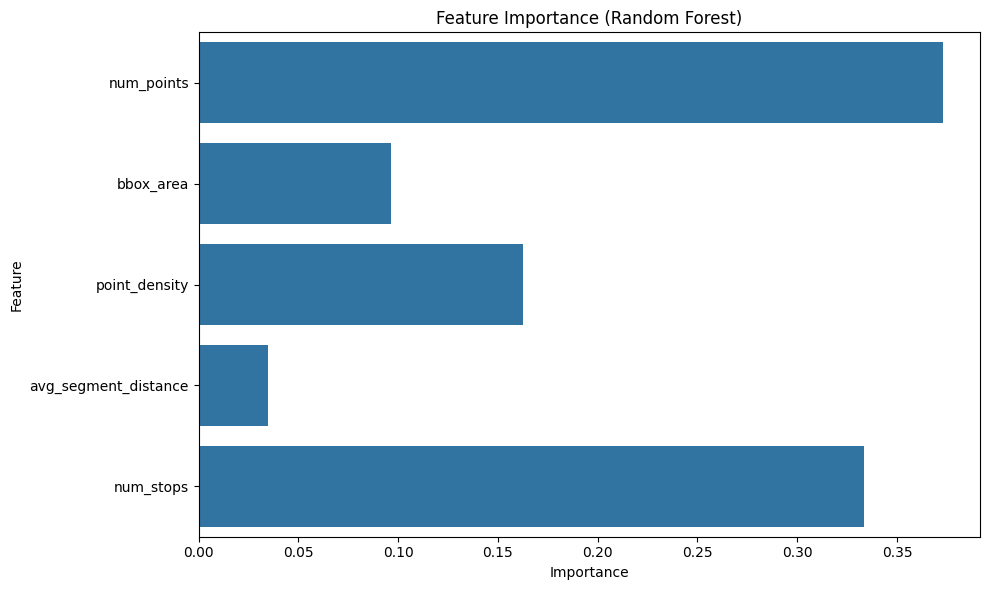

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

clf = joblib.load("rf_area_classifier.pkl")

importances = clf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, features, labels, cv=skf, scoring="accuracy")

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Std Dev:", np.std(scores))


/home/neyon/fhv/bachelor_thesis_infeo/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores: [0.98823529 0.98823529 1.         1.         0.98823529 1.
 0.98823529 0.98823529 0.95294118 1.        ]
Mean Accuracy: 0.9894117647058824
Std Dev: 0.01336213728423595
